# File / Class Conversion

Examples are given for conversion between CRYSTALpytools classes and external classes. Functions tested here are defined in the `convert` module.

## CRYSTAL <-> pymatgen

### The 'cry_out2pmg()' function

`cry_out2pmg()` converts a CRYSTAL output file into a pymatgen Structure/Molecule object, which is different from the `crystal_io.Crystal_ouput.get_geometry()` method, where the `geometry.CStructure` class is returned.

Get the optimized geometry of MgO.

In [1]:
from CRYSTALpytools.convert import cry_out2pmg

struc = cry_out2pmg('conv_mgoOpt.out',initial=False)
print(struc)

Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.998288   2.998288   2.998288
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b     c
---  ----  ---  ---  ----
  0  Mg    0    0     0
  1  O     0.5  0.5  -0.5


Get a Molecule class for CO.

In [2]:
from CRYSTALpytools.convert import cry_out2pmg

struc = cry_out2pmg('conv_coOpt.out',initial=False, molecule=True)
print(struc)

Full Formula (C1 O1)
Reduced Formula: CO
Charge = 0.0, Spin Mult = 1
Sites (2)
0 C    -0.063726    -0.039829    -0.031863
1 O     0.863726     0.539829     0.431863


### The 'cry_gui2pmg' function

`cry_gui2pmg()` converts a CRYSTAL GUI (fort.34) file into a pymatgen Structure/Molecule object.

**NOTE**

Currently, symmetry information of GUI class is lost during conversion.

In [3]:
from CRYSTALpytools.convert import cry_gui2pmg

struc = cry_gui2pmg('conv_paracetamol.gui')
print(struc)

Full Formula (H36 C32 N4 O8)
Reduced Formula: H9C8NO2
abc   :   7.161425   9.265602  12.677166
angles:  90.000000 116.348749  90.000000
pbc   :       True       True       True
Sites (80)
  #  SP            a          b          c
---  ----  ---------  ---------  ---------
  0  O      0.05598    0.43021   -0.286803
  1  O     -0.05598   -0.06979   -0.213197
  2  O     -0.05598   -0.43021    0.286803
  3  O      0.05598    0.06979    0.213197
  4  O      0.453896  -0.002239   0.302393
  5  O      0.546104   0.497761   0.197607
  6  O     -0.453896   0.002239  -0.302393
  7  O     -0.546104  -0.497761  -0.197607
  8  N     -0.212129   0.043273   0.339866
  9  N      0.212129  -0.456727   0.160134
 10  N      0.212129  -0.043273  -0.339866
 11  N     -0.212129   0.456727  -0.160134
 12  C     -0.149616   0.137894   0.436285
 13  C      0.149616  -0.362106   0.063715
 14  C      0.149616  -0.137894  -0.436285
 15  C     -0.149616   0.362106  -0.063715
 16  C     -0.237476   0.141661  -0.48

With the `vacuum` option, vacuum layer with the specified thickness is inserted along the non-periodic direction(s). The returned structure is 3D periodic. For non-periodic structures, set `vacuum=None`.

In [4]:
from CRYSTALpytools.convert import cry_gui2pmg

struc = cry_gui2pmg('conv_mgo100.gui', vacuum=20)
print(struc)

Full Formula (Mg2 O4)
Reduced Formula: MgO2
abc   :   3.009789   3.009789  26.128240
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (6)
  #  SP      a    b          c
---  ----  ---  ---  ---------
  0  Mg    0    0.5   0.040727
  1  Mg    0.5  0    -0.040727
  2  O     0    0.5  -0.040727
  3  O     0.5  0     0.040727
  4  O     0.5  0    -0.117272
  5  O     0    0.5   0.117272


Alternatively, a 2D periodic structure is returned with default 500 Angstrom along non-periodic direction(s).

In [5]:
from CRYSTALpytools.convert import cry_gui2pmg

struc = cry_gui2pmg('conv_mgo100.gui')
print(struc)

Full Formula (Mg2 O4)
Reduced Formula: MgO2
abc   :   3.009789   3.009789 500.000000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True      False
Sites (6)
  #  SP      a    b          c
---  ----  ---  ---  ---------
  0  Mg    0    0.5   0.002128
  1  Mg    0.5  0    -0.002128
  2  O     0    0.5  -0.002128
  3  O     0.5  0     0.002128
  4  O     0.5  0    -0.006128
  5  O     0    0.5   0.006128


### The 'cry_pmg2gui()' function

`cry_pmg2gui()` saves a pymatgen structure/molecule object into a CRYSTAL gui object and (optionally) writes it into a gui (fort.34) file.

Setting `gui_file=None` (default) to disable gui file output

**NOTE**

Currently, symmetry analysis (`symmetry=True`) is limited to 3D and 2D cases.

In [6]:
from CRYSTALpytools.crystal_io import Crystal_output
from CRYSTALpytools.convert import cry_pmg2gui

out = Crystal_output('conv_mgoOpt.out')
struc = out.get_geometry(initial=False)
struc.make_supercell([[-1, 1, 1], [1, -1, 1], [1, 1, -1]])

mgo_gui = cry_pmg2gui(struc, gui_file='conv_mgoOpt.gui', symmetry=True)

### The 'cry_bands2pmg()'' function

Essentially this is a short cut for `electronics.ElectronBand.to_pmg()` method.

Read the band and plot.

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

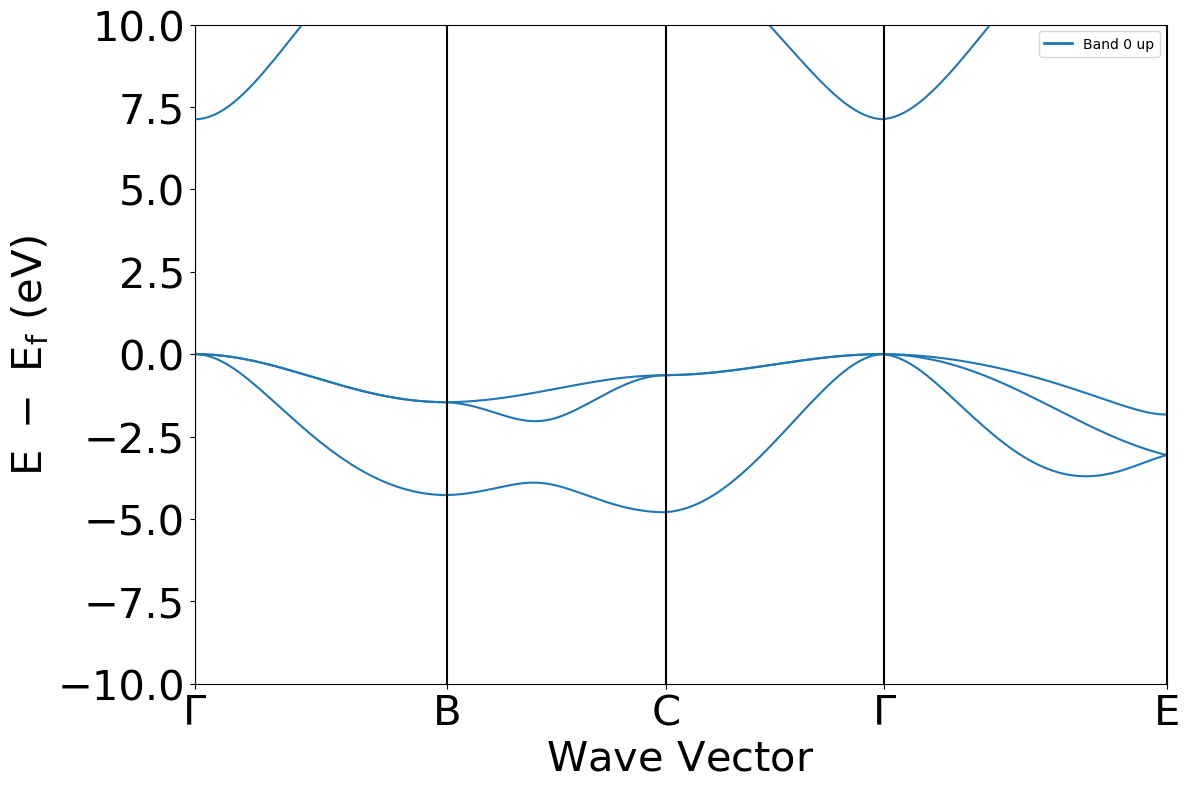

In [7]:
from CRYSTALpytools.convert import cry_bands2pmg
from pymatgen.electronic_structure.plotter import BSPlotter

bs = cry_bands2pmg('conv_mgoBand.BAND', 'conv_mgoBand.outp',
                   labels=[r'$\Gamma$','B','C',r'$\Gamma$','E'])
bsplot = BSPlotter(bs)
bsplot.get_plot(ylim=(-10, 10), zero_to_efermi=True)

## CRYSTAL <-> ASE

Fundamentally, CRYSTALpytools converts its classes to pymatgen classes and calls pymatgen to further convert them into other classes.

### The 'cry_out2ase()' function

In [7]:
from CRYSTALpytools.convert import cry_out2ase

co_ase = cry_out2ase('conv_coOpt.out', initial=True)
print(co_ase)

MSONAtoms(symbols='CO', pbc=False)


### The 'cry_gui2ase()' function

Convert GUI file/class into ASE 'Atoms' class.

In [8]:
from CRYSTALpytools.convert import cry_gui2ase

mgo_ase = cry_gui2ase('conv_mgo100.gui', vacuum=10)
print(mgo_ase)

MSONAtoms(symbols='Mg2O4', pbc=True, cell=[[3.00978870041, 0.0, 0.0], [-1.84296404903e-16, 3.00978870041, 0.0], [0.0, 0.0, 16.128239999999998]])


### The 'cry_ase2gui()' function
Setting `gui_file=None` (default) to disable gui file output

In [9]:
from CRYSTALpytools.convert import cry_ase2gui
from ase.build import bulk

copper_ase = bulk('Cu', 'fcc', a=3.6)
copper_gui = cry_ase2gui(copper_ase, gui_file='conv_CuASE.gui', symmetry=True)

## Saving structure files (.cif and .xyz)

### The 'cry_out2cif()' function
Optional arguments can be put at the end, which will be passed to the [pymatgen.io.cif.CifWriter](https://pymatgen.org/pymatgen.io.html#pymatgen.io.cif.CifWriter) object.

By default, symmetrized structure output is enabled with `symprec=0.01`.

In [10]:
from CRYSTALpytools.convert import cry_out2cif

cry_out2cif('conv_mgo100.out', 'conv_mgo100.cif', vacuum=10, initial=True)
! cat conv_mgo100.cif

# generated using pymatgen
data_MgO2
_symmetry_space_group_name_H-M   P4/nmm
_cell_length_a   3.00978870
_cell_length_b   3.00978870
_cell_length_c   16.12824000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   129
_chemical_formula_structural   MgO2
_chemical_formula_sum   'Mg2 O4'
_cell_volume   146.10295240
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
  2  '-y+1/2, x+1/2, z'
  3  '-x, -y, z'
  4  'y+1/2, -x+1/2, z'
  5  'x+1/2, -y+1/2, -z'
  6  '-y, -x, -z'
  7  '-x+1/2, y+1/2, -z'
  8  'y, x, -z'
  9  '-x+1/2, -y+1/2, -z'
  10  'y, -x, -z'
  11  'x+1/2, y+1/2, -z'
  12  '-y, x, -z'
  13  '-x, y, z'
  14  'y+1/2, x+1/2, z'
  15  'x, -y, z'
  16  '-y+1/2, -x+1/2, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Mg  Mg0  2  0.00000000

### The 'cry_gui2cif()' function
Optional arguments can be put at the end, which will be passed to the [pymatgen.io.cif.CifWriter](https://pymatgen.org/pymatgen.io.html#pymatgen.io.cif.CifWriter) object.

By default, symmetrized structure output is enabled with `symprec=0.01`.

In [11]:
from CRYSTALpytools.convert import cry_gui2cif

cry_gui2cif('conv_paracetamol.gui', 'conv_paracetamol.cif')
! cat conv_paracetamol.cif

# generated using pymatgen
data_H9C8NO2
_symmetry_space_group_name_H-M   P2_1/c
_cell_length_a   7.16142460
_cell_length_b   9.26560241
_cell_length_c   12.67716617
_cell_angle_alpha   90.00000000
_cell_angle_beta   116.34874858
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   14
_chemical_formula_structural   H9C8NO2
_chemical_formula_sum   'H36 C32 N4 O8'
_cell_volume   753.80006344
_cell_formula_units_Z   4
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
  2  '-x, -y, -z'
  3  '-x, y+1/2, -z+1/2'
  4  'x, -y+1/2, z+1/2'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  H  H0  4  0.08698795  0.22858371  0.39602925  1
  H  H1  4  0.10539508  0.52842732  0.19129183  1
  H  H2  4  0.19554393  0.03012373  0.23420412  1
  H  H3  4  0.21224837  0.09923841  0.05802646  1
  H  H4  4  0.23735644  0.74066371  0.83363740  1
  H  H5  4  0.

### The 'cry_gui2xyz()' function

Optional arguments can be put at the end, which will be passed to the [pymatgen.io.xyz.XYZ](https://pymatgen.org/pymatgen.io.html#pymatgen.io.xyz.XYZ) object.

In [1]:
from CRYSTALpytools.convert import cry_gui2xyz

cry_gui2xyz('conv_THF.gui', 'conv_THF.xyz')
!cat conv_THF.xyz

13
H8 C4 O1
C 0.741332 2.117653 1.407777
C 1.893667 3.049791 1.036298
C 3.098124 2.139956 1.256255
O 2.655667 0.819485 0.961776
C 1.238012 0.791402 0.842854
H 0.641873 2.054622 2.492302
H -0.216641 2.420182 0.989685
H 1.821281 3.336523 -0.013719
H 1.934790 3.954421 1.639420
H 3.942117 2.379091 0.609359
H 3.435426 2.182677 2.296453
H 0.965393 0.690877 -0.212497
H 0.859259 -0.076681 1.382035

### The 'cry_out2xyz()' function

Optional arguments can be put at the end, which will be passed to the [pymatgen.io.xyz.XYZ](https://pymatgen.org/pymatgen.io.html#pymatgen.io.xyz.XYZ) object.

In [2]:
from CRYSTALpytools.convert import cry_out2xyz

cry_out2xyz('conv_toluene.out', 'conv_toluene.xyz')
!cat conv_toluene.xyz

15
H8 C7
C -0.984612 0.000163 0.014830
C -0.270650 1.195597 0.011653
C -0.270798 -1.195337 0.010052
C -2.488953 0.000108 -0.002093
C 1.117118 1.198581 -0.001608
C 1.116957 -1.198632 -0.002841
C 1.816634 -0.000078 -0.010182
H -0.809924 2.135277 0.022707
H -0.810214 -2.134972 0.020237
H -2.888568 -0.880617 0.498531
H -2.888737 0.885078 0.490855
H -2.864355 -0.004536 -1.026829
H 1.652616 2.138815 -0.002050
H 1.652252 -2.138983 -0.003587
H 2.898133 -0.000164 -0.017475

For more information please refer to the [API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.convert.html).